In [1]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Homework #4
## Problem 1

![Pendulum bob attached to springs](../images/spring_pendulum.svg)

The pendulum bob of mass m, shown in the figure above, is suspended by an inextensible
string from the point p. This point is free to move along a straight horizontal line under
the action of the springs, each having a constant k. Assume that the mass is displaced
only slightly from the equilibrium position and released. Neglecting the mass of the
springs, show that the pendulum oscillates with a period of

$P=2\pi\sqrt{\frac{mg+2kr}{2kg}}$

use a first-order Taylor series approximation for $\sin\theta\approx\theta$ and $\cos\theta\approx 1$

Solve for $\theta(t)$ if m=0.1 kg, r=1 m, $\theta(0)$=pi/6 rad, and $\dot{\theta}(0)$=0 rad/s for
2 cases:
  
  a. k=20 N/m

  b. k=$\infty$ N/m

  c. Plot the solutions of $\theta(t)$ for 2 periods on one figure

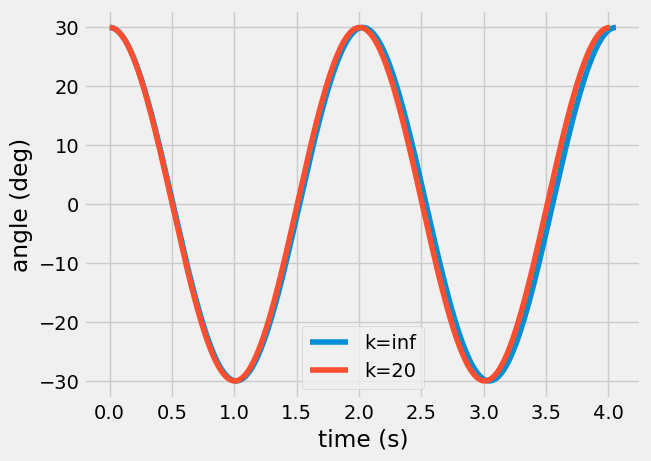

In [2]:
l=1
m=0.1 
k_a=20
k_b= 999999
g=9.81

P_a=2*pi*np.sqrt((2*k_a*l+m*g)/(2*k_a*g))
P_b=2*pi*np.sqrt((2*k_b*l+m*g)/(2*k_b*g))

w_a = np.sqrt((2*k_a*g)/(2*k_a*l+m*g))
w_b = np.sqrt((2*k_b*g)/(2*k_b*l+m*g))

t_a=np.linspace(0,P_a*2, 1000)
t_b=np.linspace(0,P_b*2, 1000)

theta_0 = pi/6

a_20 = theta_0*np.cos(w_a*t_a) # create solution for k=20 N/m
a_inf = theta_0*np.cos(w_b*t_b)# create solution for k=infty

plt.plot(t_a,a_20*180/pi,'-',label='k=inf')#conver rad to deg
plt.plot(t_b,a_inf*180/pi,'-',label='k=20')

plt.xlabel('time (s)')
plt.ylabel('angle (deg)')
plt.legend()

In [3]:
from scipy.linalg import *
from scipy.optimize import fsolve,root

In [4]:
from scipy.integrate import solve_ivp # import the ordinary differential equation integrator in Python

## Problem 2


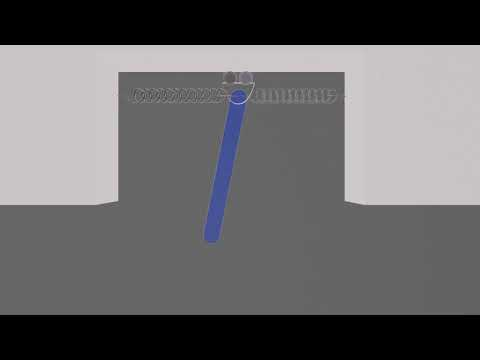

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('eOvwiYRroso')

![Compound pendulum bob attached to
springs](../images/spring_compound.svg)

The pendulum arm of mass m, shown in the figure above, is held in place by two springs. This point is free to move along a straight horizontal line under
the action of the springs, each having a constant k. Assume that the mass is displaced
only slightly from the equilibrium position and released. Neglecting the mass of the
springs, solve for the nonlinear equations of motion and use the `solve_ivp` to determine $\theta(t)$

Solve for $\theta(t)$ if m=1 kg, L=1 m, $\theta(0)$=pi/6 rad, and $\dot{\theta}(0)$=0 rad/s for
  
k=20 N/m

Plot the nonlinear solutions of $\theta(t)$ for 2 periods on one figure

In [6]:
def my_ode(t,r,):
    """
     input is time, t (s) and r=[position p (m), angle (rad), velocity p (m/s), angle velocity (rad/s)] and time
     output is dr=[velocity p (m/s), angle velocity (rad/s), accel p (m/s/s), angle accel (rad/s/s)] at time, t
     the ODE is defined by:
    
     dr = f(t,r)"""
    l=1
    m=.1
    k=20
    g=9.81
    dr=np.zeros(np.size(r))
    dr[0]=r[2]
    dr[1]=r[3]
    x, a, v, w = r
    M = np.array([[m, m*l/2*np.cos(a)],[m*l/2*np.cos(a), m*l**2/3]])
    rhs = np.array([m*l/2*w**2*np.sin(a) - 2*k*x,-m*g*l/2*np.sin(a)])
    dr[2:] = np.linalg.solve(M, rhs)
    return dr

Text(0, 0.5, 'angle (deg)')

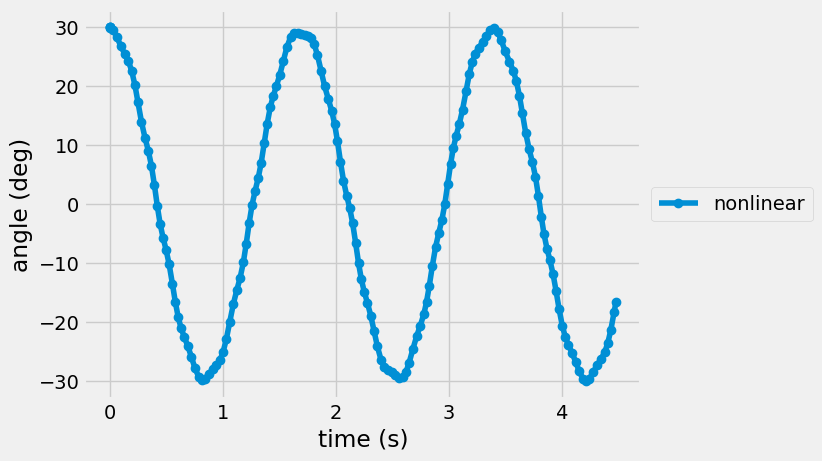

In [7]:
l=1
m=1 
k=20
g=9.81
P=2*pi*np.sqrt((2*k*l+m*g)/(2*k*g))
r=solve_ivp(my_ode,[0,2*P],[0, pi/6,0,0]); # default = 'RK45'
plt.plot(r.t,r.y[1]*180/pi,'-o',label='nonlinear') # <-------------- your new plot, convert rad to deg with 180/pi
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time (s)')
plt.ylabel('angle (deg)')